In [1]:
import os
import numpy as np
import pandas as pd

In [43]:
arquivos = [a for a in os.listdir() if a[:5] == 'batch']
arquivos.sort()

dados = []
for arq in arquivos:
    df = pd.read_csv(arq, header=None, delimiter='-',  names=['n', 'I', 'F', 'J', 'R', 'tempo'])
    df = df.groupby(['I','F','J','R']).mean()['tempo']
    dados.append(df)

array([0.001072 , 0.0014972, 0.0024296, 0.0029614, 0.0040766, 0.0047906,
       0.005705 , 0.0059376, 0.0072634, 0.0080086, 0.0109906, 0.0108198,
       0.0121366, 0.0132414, 0.0168098, 0.0170914, 0.0194236, 0.0199524,
       0.0224426, 0.0254476])

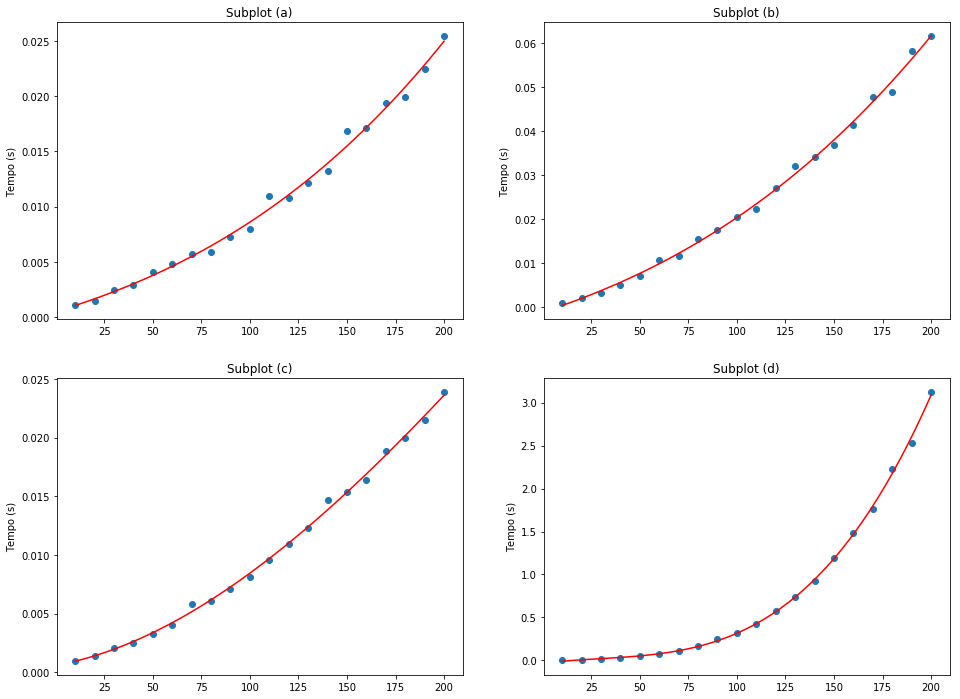

In [79]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2, 2, figsize=(16,12))
axs = [i for ax in axs for i in ax]
leg= ["(a)","(b)","(c)","(d)"]

for idx, ax in enumerate(axs):
    x = range(10, 201, 10)
    y = list(dados[idx].values)

    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    ax.plot(x, y, 'o', x_new, y_new, 'r-')
    ax.set_title("Subplot " + leg[idx])
    ax.set_ylabel("Tempo (s)")
    
plt.show()